In [1]:
import numpy as np

import ziaplot as zp

In [2]:
x = np.linspace(-10, 10, 20)
y = np.random.normal(x, 1)

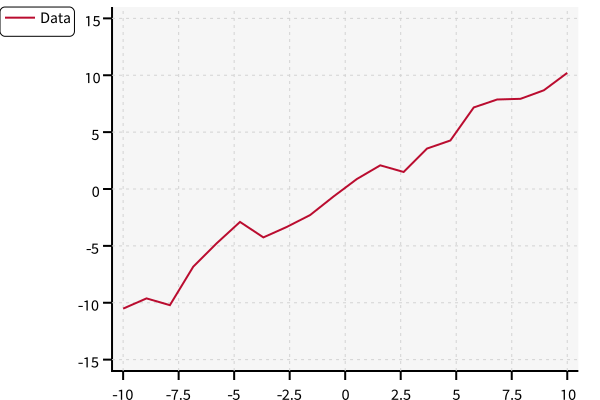

In [3]:
# Individual Line adds a default axis
zp.Line(x, y).name('Data')

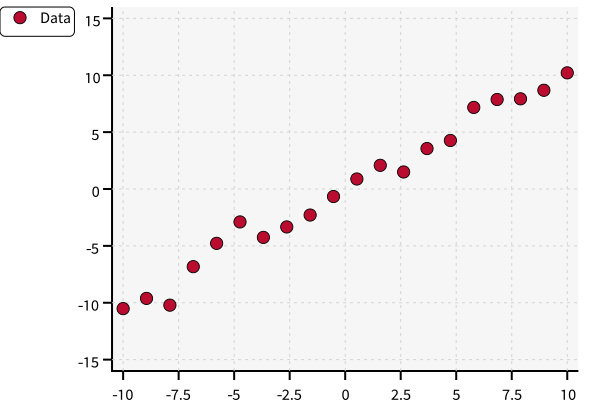

In [4]:
zp.Xy(x, y).name('Data')

In [5]:
x = zp.linspace(0, 10, 20)
y = x

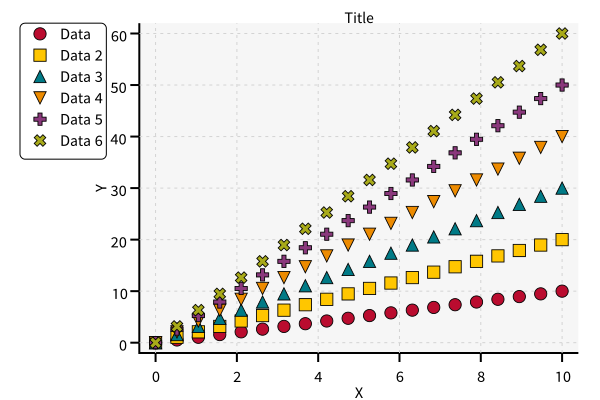

In [6]:
# Markers
p = zp.XyPlot(xname='X', yname='Y', title='Title')
p += zp.Xy(x, y).name('Data').marker('round')
p += zp.Xy(x, [yy*2 for yy in y]).name('Data 2').marker('square')
p += zp.Xy(x, [yy*3 for yy in y]).name('Data 3').marker('triangle')
p += zp.Xy(x, [yy*4 for yy in y]).name('Data 4').marker('triangled')
p += zp.Xy(x, [yy*5 for yy in y]).name('Data 5').marker('+')
p += zp.Xy(x, [yy*6 for yy in y]).name('Data 6').marker('x')
p

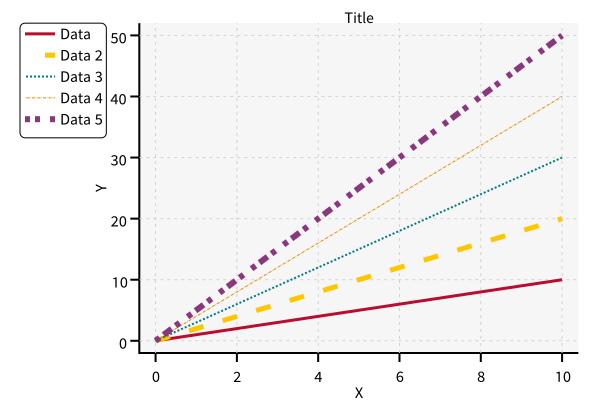

In [7]:
# Strokes
p = zp.XyPlot(xname='X', yname='Y', title='Title')
p += zp.Line(x, y).name('Data').stroke('-').strokewidth(3)
p += zp.Line(x, [yy*2 for yy in y]).name('Data 2').stroke('dashed').strokewidth(5)
p += zp.Line(x, [yy*3 for yy in y]).name('Data 3').stroke('dotted').strokewidth(2)
p += zp.Line(x, [yy*4 for yy in y]).name('Data 4').stroke('dashdot').strokewidth(1)
p += zp.Line(x, [yy*5 for yy in y]).name('Data 5').stroke('5 5 10').strokewidth(6)
p

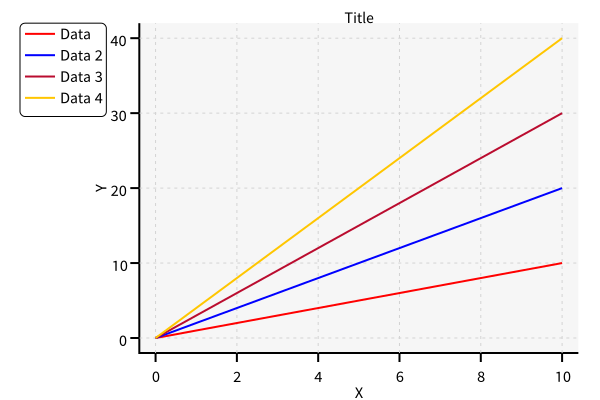

In [8]:
# Colors
p = zp.XyPlot(xname='X', yname='Y', title='Title')
p += zp.Line(x, y).name('Data').color('red')  # Named
p += zp.Line(x, [yy*2 for yy in y]).name('Data 2').color('#0000FF')  # Hex
p += zp.Line(x, [yy*3 for yy in y]).name('Data 3').color('C0')  # Theme
p += zp.Line(x, [yy*4 for yy in y]).name('Data 4').color('C1')
p

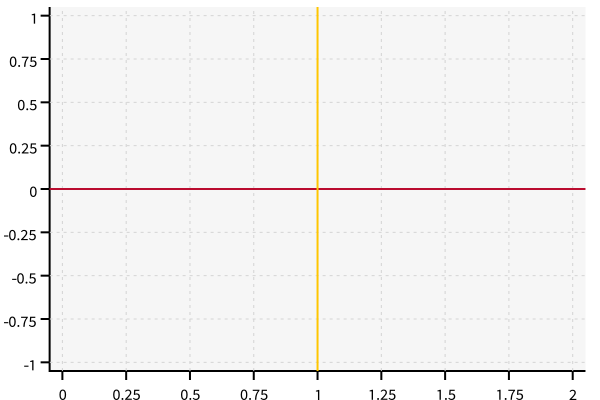

In [9]:
# H/VLine
p = zp.XyPlot()
p += zp.HLine(0)
p += zp.VLine(1)
p

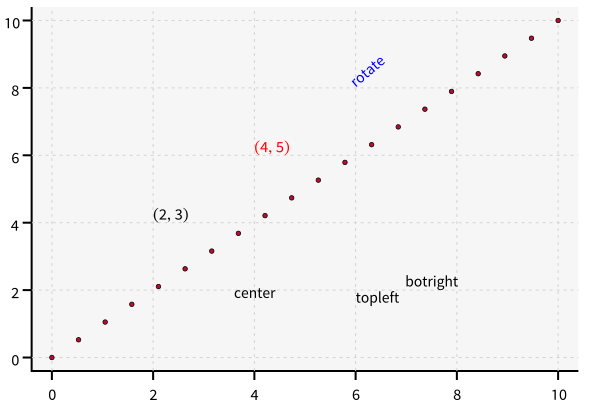

In [10]:
# Text
p = zp.XyPlot()
p += zp.Xy(x, y).marker('round', radius=3)
p += zp.Text(2, 4, '(2, 3)')
p += zp.Text(4, 6, '(4, 5)').color('red')
p += zp.Text(4, 2, 'center', halign='center', valign='center')
p += zp.Text(6, 2, 'topleft', halign='left', valign='top')
p += zp.Text(8, 2, 'botright', halign='right', valign='bottom')
p += zp.Text(6, 8, 'rotate', rotate=40).color('blue')
p

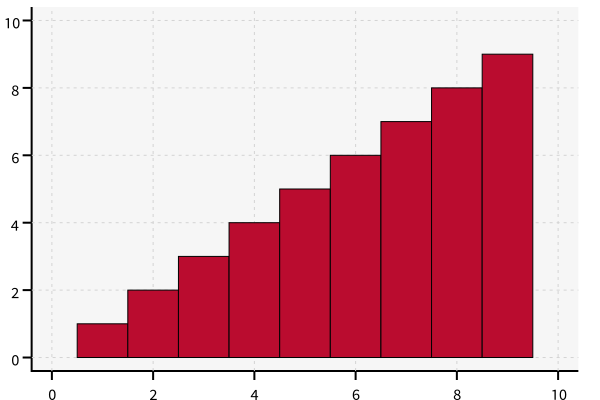

In [11]:
x = np.arange(1, 10)
y = x
zp.Bars(x, y)

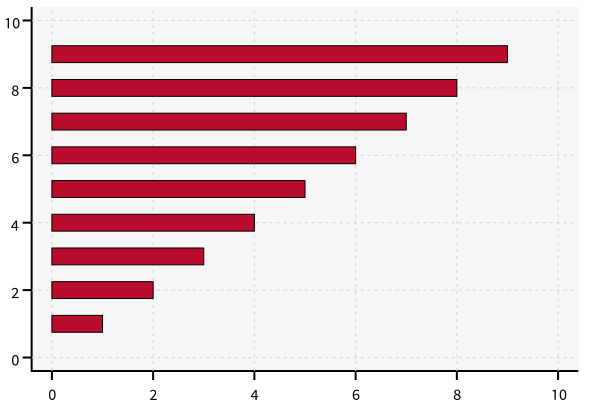

In [12]:
zp.BarsHoriz(x, y, width=.5)

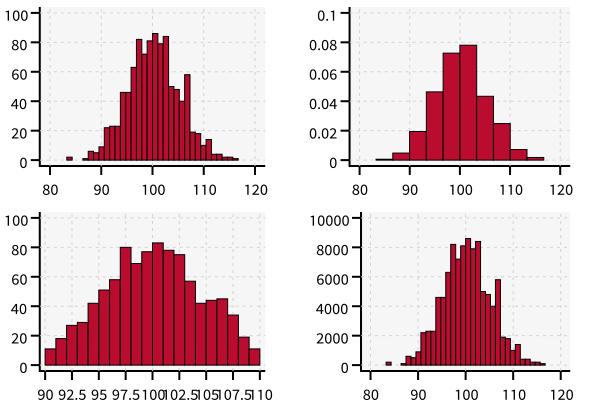

In [13]:
y = np.random.normal(100, 5, 1000)
h1 = zp.Histogram(y)
h2 = zp.Histogram(y, bins=10, density=True)
h3 = zp.Histogram(y, binrange=(90, 110, 1))
h4 = zp.Histogram(y, weights=np.ones_like(y)*100)

row1 = zp.Hlayout(h1, h2)
row2 = zp.Hlayout(h3, h4)
zp.Vlayout(row1, row2)

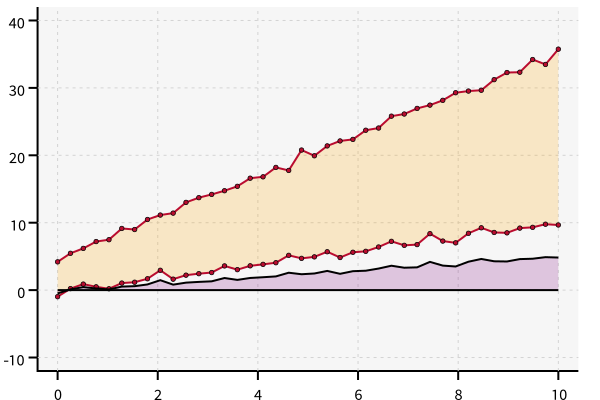

In [14]:
x = np.linspace(0, 10, 40)
y1 = x + np.random.normal(0, .5, len(x))
y2 = 3*x + 5 + np.random.normal(0, .5, len(x))

p = zp.XyPlot()
p += zp.LineFill(x, y1, y2).fill('orange', alpha=.2).marker('round', 3)
p += zp.LineFill(x, y1/2).fill('purple', alpha=.2).color('black')
p

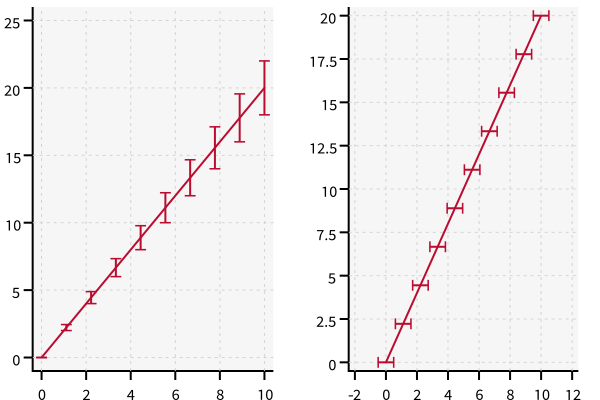

In [15]:
x = np.linspace(0, 10, 10)
y = x*2
dy = y/10
dx = np.full(len(x), .5)

p = zp.XyPlot()
p += zp.ErrorBar(x, y, dy)
p2 = zp.XyPlot()
p2 += zp.ErrorBar(x, y, xerr=dx)
zp.Hlayout(p, p2)

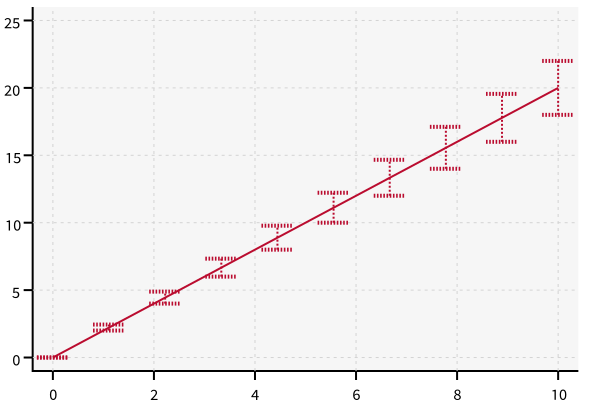

In [16]:
p = zp.XyPlot()
p += zp.ErrorBar(x, y, dy).yerrmarker(length=20, width=5, stroke=':')
p

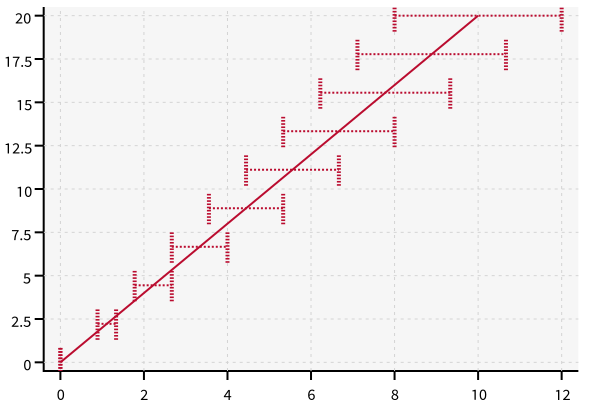

In [17]:
p = zp.XyPlot()
p += zp.ErrorBar(x, y, xerr=dy).xerrmarker(length=20, width=5, stroke=':')
p

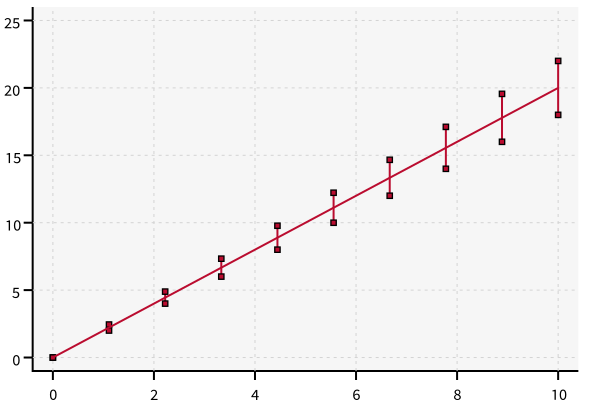

In [18]:
p = zp.XyPlot()
p += zp.ErrorBar(x, y, dy).yerrmarker('square', length=4)
p

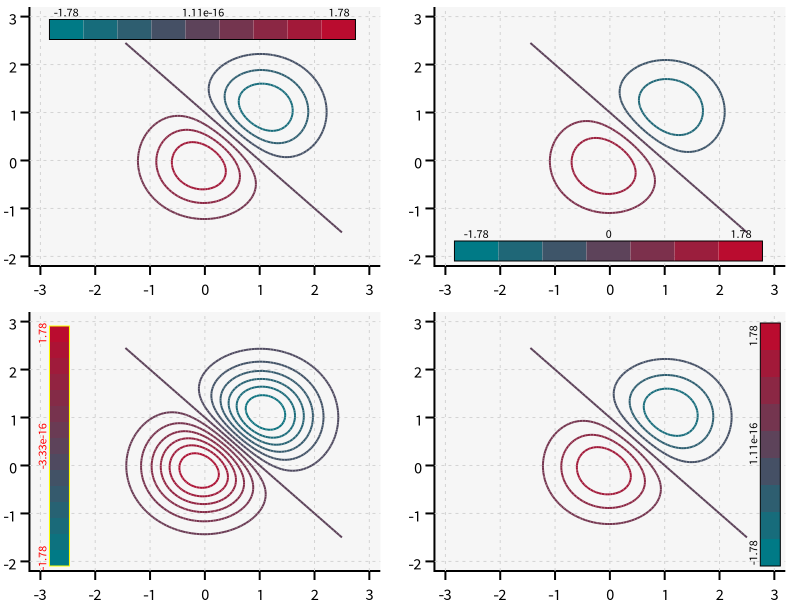

In [19]:
delta = 0.05
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-1.5, 2.5, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2


with zp.Vlayout(width=800, height=600):
    with zp.Hlayout():
        zp.Contour(X, Y, Z, colorbar='top')
        zp.Contour(X, Y, Z, levels=5, colorbar='bottom')
    with zp.Hlayout():
        p = zp.Contour(X, Y, Z, levels=13, colorbar='left')
        p.style.colorbar.bordercolor = 'yellow'
        p.style.colorbar.text.color = 'red'
        zp.Contour(X, Y, Z, colorbar='right')